In [1]:
import numpy
import scipy.interpolate
%matplotlib notebook
import matplotlib.pyplot

# Spline Turns

## Overview

At an intersection, a car has to make a smooth turn between two road endpoints. To approximate this effect, I will attempt to fit a spline between the two roads. The spline should represent a car's path along the entire path from one road to another. 

## Defining Roads

We can define the roads parametrically in two dimensions. The general equation for a line from point $\langle x_a, y_a \rangle$ to $\langle x_b, y_b \rangle$ in parametric form is

$$ \ell(t) = \langle x_a + (x_b - x_a) t, y_a + (y_b - y_a) t \rangle \quad \forall t \in [0, 1] $$

In particular, we will focus on two perpendicular, linear roads. The first goes from $\langle 3, 2 \rangle$ to $\langle 3, 3 \rangle$. The second from $\langle 4, 4 \rangle$ to $\langle 5, 4 \rangle$. These are defined by the equations

$$ \ell_a(t) = \langle 3, 2 + t \rangle \quad \forall t \in [0, 1] $$
$$ \ell_b(t) = \langle 4 + t, 4 \rangle \quad \forall t \in [0, 1] $$ 

In [2]:
# Each component must have a dependence on `t` for NumPy to broadcast correctly
l_a = lambda t: numpy.array([[3 + 0 * t], [2 + t]])
l_b = lambda t: numpy.array([[4 + t], [4 + 0 * t]])

Now we can visualize the problem a little better by plotting the roads.

<IPython.core.display.Javascript object>


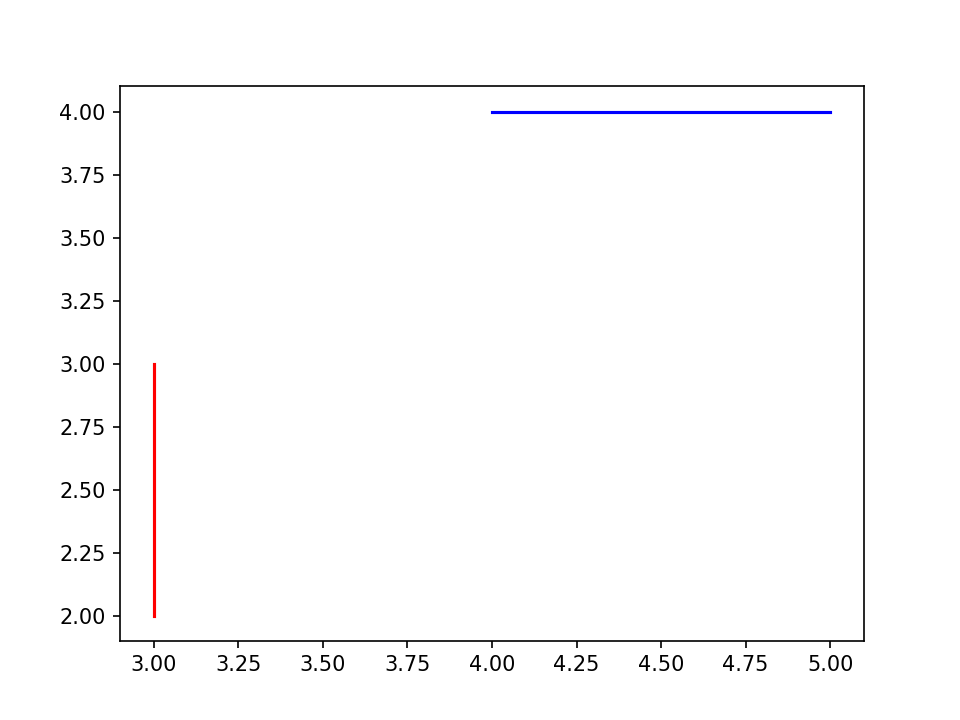

In [3]:
fig, ax = matplotlib.pyplot.subplots()

t_a = t_b = numpy.linspace(0, 1, 100)

ax.plot(l_a(t_a)[0].flatten(), l_a(t_a)[1].flatten(), 'r')
ax.plot(l_b(t_b)[0].flatten(), l_b(t_b)[1].flatten(), 'b')

matplotlib.pyplot.show()

## Solving the Spline

With the roads defined, we can discretize the roads and feed the samples into SciPy's parametric spline representation algorithm. 

First, we combine the two roads into one sequence of samples.

In [4]:
x = numpy.hstack([l_a(t_a)[0].flatten(), l_b(t_b)[0].flatten()])
y = numpy.hstack([l_a(t_a)[1].flatten(), l_b(t_b)[1].flatten()])
points = [x, y]

Next, feed the points into `splprep` with no smoothing factor to keep the well-defined roads as smooth as possible.

In [5]:
spline, _ = scipy.interpolate.splprep(points, s=0)

With the spline representation, we can plot the smoothed turn using `splev` to confirm proper smooth turning.

<IPython.core.display.Javascript object>


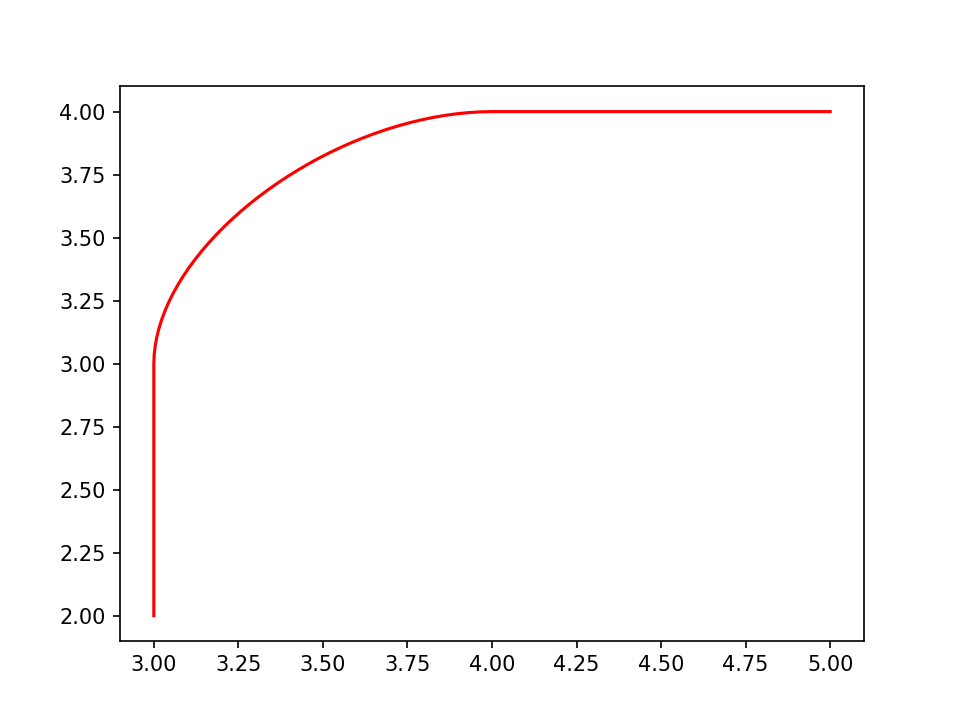

In [6]:
fig, ax = matplotlib.pyplot.subplots()
t = numpy.linspace(0, 1, 100)
ax.plot(scipy.interpolate.splev(t, spline)[0], scipy.interpolate.splev(t, spline)[1], 'r-')
matplotlib.pyplot.show()

## Examples

To confirm flexibility, we can try other road combinations.

Consider the roads defined by the functions

$$ \ell_a(t) = \langle 2 + t, 2 + t \rangle \quad \forall t \in [0, 1] $$
$$ \ell_b(t) = \langle 4 + t, 3 - t \rangle \quad \forall t \in [0, 1] $$ 

In [7]:
l_a = lambda t: numpy.array([[2 + t], [2 + t]])
l_b = lambda t: numpy.array([[4 + t], [3 - t]])

Let's visualize these roads.

<IPython.core.display.Javascript object>


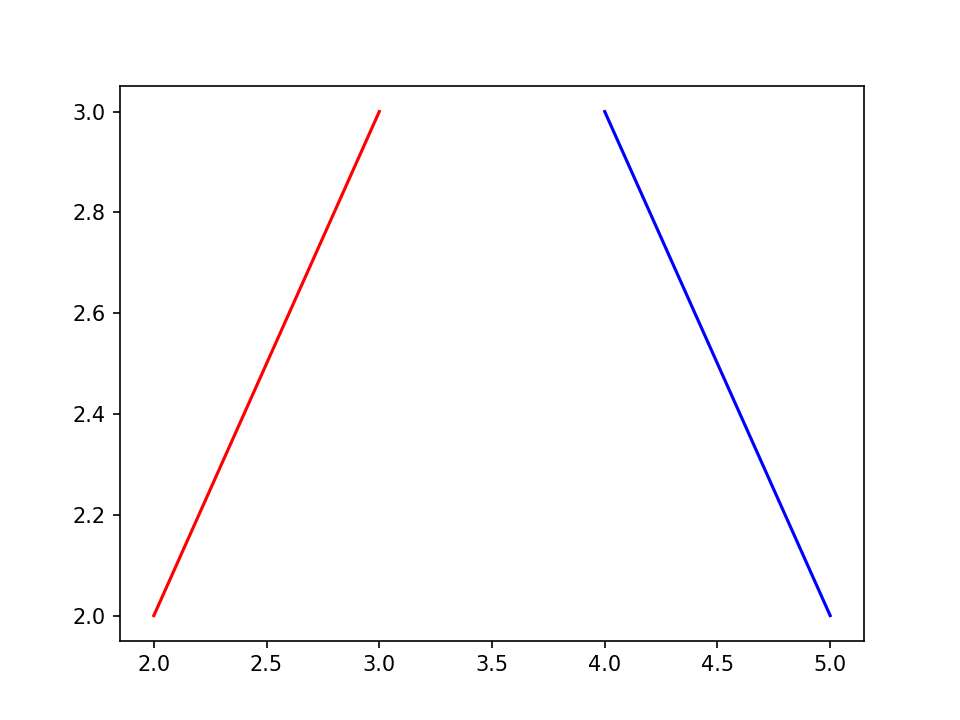

In [8]:
t_a = t_b = numpy.linspace(0, 1, 10)
fig, ax = matplotlib.pyplot.subplots()
ax.plot(l_a(t_a)[0].flatten(), l_a(t_a)[1].flatten(), 'r')
ax.plot(l_b(t_b)[0].flatten(), l_b(t_b)[1].flatten(), 'b')
matplotlib.pyplot.show()

Let's plot the spline.

<IPython.core.display.Javascript object>


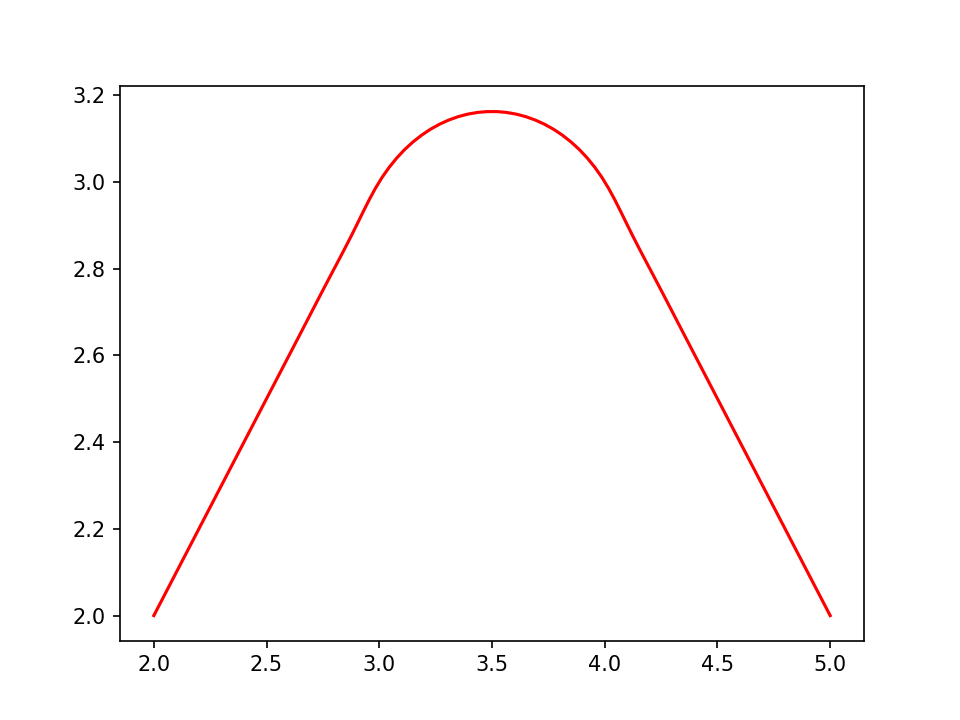

In [9]:
x = numpy.hstack([l_a(t_a)[0].flatten(), l_b(t_b)[0].flatten()])
y = numpy.hstack([l_a(t_a)[1].flatten(), l_b(t_b)[1].flatten()])
points = [x, y]

spline, _ = scipy.interpolate.splprep(points, s=0)

fig, ax = matplotlib.pyplot.subplots()
t = numpy.linspace(0, 1, 100)
ax.plot(scipy.interpolate.splev(t, spline)[0], scipy.interpolate.splev(t, spline)[1], 'r-')
matplotlib.pyplot.show()

## Conclusion

I can't see any issues with this method. It is easy to define roads, easy to fit the spline, and easy to interpret the results. As a result, I will be using this model.